<a href="https://colab.research.google.com/github/PranavBharadwaj-1328/FaceMaskDetection/blob/main/maskdetect_mobilenetv2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Transfer learning using MobileNetV2 for face mask detection

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

Fetching the trained model

In [ ]:
trained_model = tf.keras.applications.mobilenet_v2.MobileNetV2(input_shape=(224,224,3), weights='imagenet', include_top=False)
print(trained_model.output_shape)

(None, 7, 7, 1280)


Making the layers of trained model un-trainable 

In [ ]:
for layer in trained_model.layers:
  layer.trainable = False
last_layer = trained_model.get_layer('out_relu')
last_output = last_layer.output
print(last_output.shape)

(None, 7, 7, 1280)


Adding a Flatten, Dense(512), Dropout(0.2), Dense(128), Dropout(0.1) and Dense(1)

In [ ]:
x = layers.Flatten()(last_output)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.1)(x)
x = layers.Dense(1, activation='sigmoid')(x)
model = Model(trained_model.input,x)
model.compile(optimizer = Adam(learning_rate=0.0001),
              loss = tf.keras.losses.BinaryCrossentropy(),
              metrics = [tf.keras.metrics.BinaryAccuracy()])

In [ ]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                           

In [ ]:
base = '/content/drive/MyDrive/data'
train = os.path.join(base,'Train')
test = os.path.join(base,'Test')

In [ ]:
train_settings = ImageDataGenerator(rescale=1.0/255.,
                                     rotation_range=40,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     shear_range=0.2,
                                     zoom_range=0.2,
                                     horizontal_flip=True,
                                     fill_mode='nearest')
test_settings = ImageDataGenerator(rescale=1.0/255.)

In [ ]:
train_gen = train_settings.flow_from_directory(train,
                                               batch_size=64,
                                               class_mode='binary',
                                               target_size=(224,224))
test_gen = test_settings.flow_from_directory(test,
                                               batch_size=20,
                                               class_mode='binary',
                                               target_size=(224,224))

Found 2342 images belonging to 2 classes.
Found 300 images belonging to 2 classes.


In [ ]:
history = model.fit(train_gen,
                    validation_data=test_gen,
                    verbose=1,
                    shuffle=True,
                    epochs=4,
                    steps_per_epoch=10,
                    validation_steps=5)

Epoch 1/4
10/10 [==============================] - 39s 3s/step - loss: 0.5772 - binary_accuracy: 0.7834 - val_loss: 0.1729 - val_binary_accuracy: 0.9200
Epoch 2/4
10/10 [==============================] - 34s 3s/step - loss: 0.1391 - binary_accuracy: 0.9516 - val_loss: 0.0455 - val_binary_accuracy: 0.9900
Epoch 3/4
10/10 [==============================] - 33s 3s/step - loss: 0.0916 - binary_accuracy: 0.9674 - val_loss: 0.0132 - val_binary_accuracy: 1.0000
Epoch 4/4
10/10 [==============================] - 34s 3s/step - loss: 0.0666 - binary_accuracy: 0.9797 - val_loss: 0.0081 - val_binary_accuracy: 1.0000


In [ ]:
model.save('/content/drive/MyDrive/data/mnetv22.h5')

In [ ]:
import cv2
import keras

In [ ]:
maskdetector = keras.models.load_model('/content/drive/MyDrive/data/mnetv22.h5')

In [ ]:
mimg = cv2.imread('/content/pbm.jpg')
nmimg = cv2.imread('/content/pbnm.jpg')
mimg = cv2.resize(mimg,(224,224))
nmimg = cv2.resize(nmimg,(224,224))
pic1 = mimg.reshape(1,224,224,3)
pic2 = nmimg.reshape(1,224,224,3)

In [ ]:
pic1 = tf.keras.applications.mobilenet_v2.preprocess_input(pic1,data_format='channels_last')
pic2 = tf.keras.applications.mobilenet_v2.preprocess_input(pic2,data_format='channels_last')

In [ ]:
predictions = maskdetector.predict(pic2)

In [ ]:
print(predictions)

[[0.9896482]]


In [ ]:
epochs = [0,1,2,3,4]
accuracy = [0]+ history.history['binary_accuracy']
val_accuracy = [0] + history.history['val_binary_accuracy']
val_loss = [1] + history.history['val_loss']
loss = [1] + history.history['loss']
print(epochs)
print(accuracy)
print(loss)

[0, 1, 2, 3, 4]
[0, 0.7833876013755798, 0.9515625238418579, 0.9674267172813416, 0.979687511920929]
[1, 0.5771595239639282, 0.13909578323364258, 0.09160399436950684, 0.06663195788860321]


In [ ]:
print(val_accuracy)
print(val_loss)

[0, 0.9200000166893005, 0.9900000095367432, 1.0, 1.0]
[1, 0.17285743355751038, 0.04547563195228577, 0.013227417133748531, 0.008101008832454681]


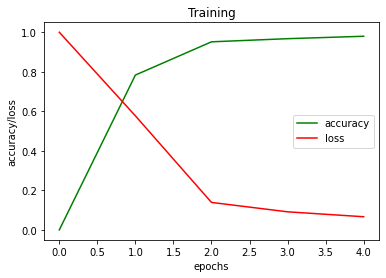

In [ ]:
import matplotlib.pyplot as plt
plt.title('Training')
plt.plot(epochs,accuracy,'g-')
plt.plot(epochs, loss, 'r-')
plt.xlabel('epochs')
plt.ylabel('accuracy/loss')
plt.legend(["accuracy", "loss"], loc ="center right")
plt.show()

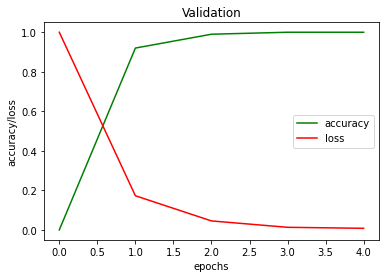

In [ ]:
plt.title('Validation')
plt.plot(epochs,val_accuracy,'g-')
plt.plot(epochs, val_loss, 'r-')
plt.xlabel('epochs')
plt.ylabel('accuracy/loss')
plt.legend(["accuracy", "loss"], loc ="center right")
plt.show()